In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
location = r'E:\python4\1226monthtest\train_new.csv'

In [3]:
df = pd.read_csv(location)

In [4]:
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.925,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.1,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,NaN,S


In [5]:
#数据集信息，包含数据集大小、列名、类型
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Unnamed: 0     891 non-null int64
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null object
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(1), int64(6), object(6)
memory usage: 90.6+ KB


In [6]:
df.columns.values

array(['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex',
       'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype=object)

# 数据观察

In [7]:
#通过对数据的初步观测，这个数据样本一共有891行*13列数据，字段包含：
#'Unnamed: 0'(无用字段)、'Survived'(是否活下来)、'Pclass'(船舱等级)、'Name'(姓名)、
#'Sex'(性别)、'Age'(年龄)、'SibSp'(兄弟姐妹同行数量)、'Parch'(父母配偶同行数量)、'Ticket'(票)、
#'Fare'(费用)、'Cabin'(船舱)、'Embarked'(上船站)
#其中，Age、Cabin、Embarked包含了空值

In [8]:
#显示重复的数据数量
df.duplicated().value_counts()
#数据集一共有891行数据，不重复。

False    891
dtype: int64

In [9]:
#重复数据
print(df['Age'].isnull().value_counts())
print('-'*50)
print(df['Cabin'].isnull().value_counts())
print('-'*50)
print(df['Embarked'].isnull().value_counts())

False    714
True     177
Name: Age, dtype: int64
--------------------------------------------------
True     687
False    204
Name: Cabin, dtype: int64
--------------------------------------------------
False    889
True       2
Name: Embarked, dtype: int64


In [10]:
#Age列一共有177行空数据
#Cabin列一共有204行空数据
#Embarked列一共有2行空数据

In [11]:
s = df.Fare.str.replace('$','')
s = s.apply(lambda x:float(x))
df['price'] = s

In [12]:
#描述性分析
df.describe()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,price
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
#描述性统计：
#在这891名乘客中，有38%的人活了下来
#所有乘客中，年龄最小的只有0.4岁，最大的有80岁，平均年龄在29岁左右
#平均每个乘客有0.52个兄弟姐妹陪同，有0.38个父母配偶陪同
#有些乘客有8名同行的人
#乘客平均花费32美元，最高花费512美元

In [14]:
#数据清洗
#删除Unnamed: 0这一列(这一列对于数据分析结果没有影响)
#删除Cabin这一列(这一列缺失值过多，且对于数据分析结果没有太大的影响)
del df['Unnamed: 0']
del df['Cabin']

In [15]:
#填充Age、Embarked两列的空值：
df['Age'] = df['Age'].fillna(df['Age'].mean()).astype(np.int64)
df['Embarked'] = df['Embarked'].fillna('S')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null object
Embarked       891 non-null object
price          891 non-null float64
dtypes: float64(1), int64(6), object(5)
memory usage: 83.6+ KB


# 数据可视化分析

# 891人当中，生还比率与未生还比率是多少？

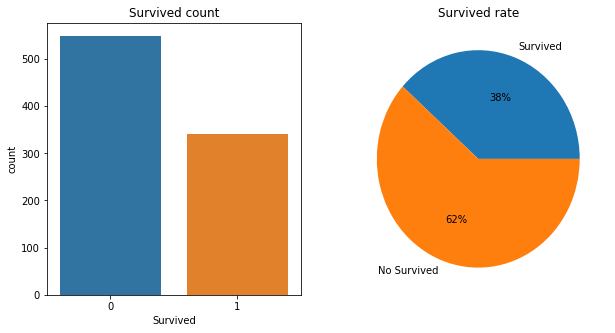

In [17]:
total_survived = df['Survived'].sum()
no_survived = 891 - total_survived

plt.figure(figsize = (10,5))
plt.subplot(121)
sns.countplot(x = 'Survived',data = df)
plt.title('Survived count')

plt.subplot(122)
plt.pie([total_survived,no_survived],labels = ['Survived','No Survived'],
       autopct = '%1.0f%%')
plt.title('Survived rate')

plt.show()

In [18]:
#结论：这891名乘客中，生还和未生还率分别为38%和62%

# 舱位Pclass与生还率关系

In [19]:
df.pivot_table(values = 'Name',index = 'Pclass',aggfunc = 'count')

,Name
Pclass,
1,216
2,184
3,491


In [20]:
df[['Pclass','Name']].groupby('Pclass').count()

,Name
Pclass,
1,216
2,184
3,491


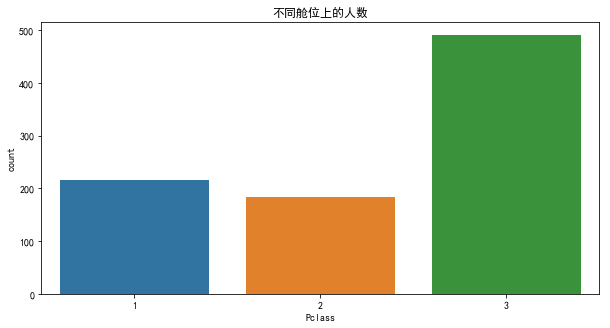

In [21]:
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.figure(figsize = (10,5))
sns.countplot(x = 'Pclass',data = df)
plt.title('不同舱位上的人数')
plt.show()

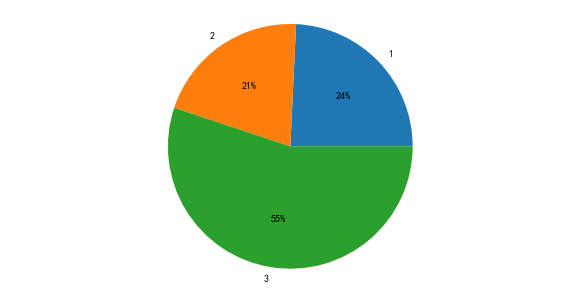

In [22]:
#画个饼图
plt.figure(figsize = (10,5))
plt.pie(df[['Pclass','Name']].groupby('Pclass').count(),
        labels = ['1','2','3'],autopct = '%1.0f%%')
plt.axis('equal')
plt.show()

In [23]:
#接着求出舱位与生还率的关系
df.pivot_table(values = 'Survived',index = 'Pclass',aggfunc = 'mean')

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [24]:
# df[df['Pclass'] == 1]['Survived'].sum() / df[df['Pclass'] == 1]['Survived'].size

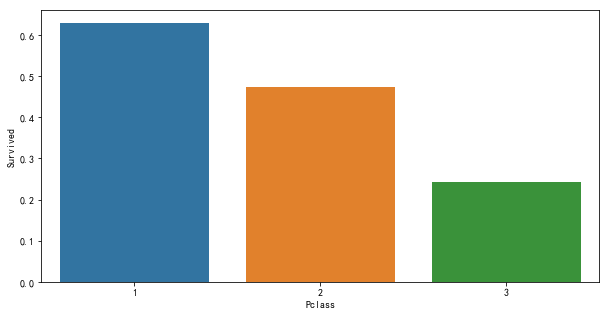

In [25]:
#可视化操作
plt.figure(figsize = (10,5))
sns.barplot(data = df,x = 'Pclass',y = 'Survived',ci = None)#ci表示置信区间
plt.show()

In [26]:
#结论：头等舱的生还概率最大，其次是二等舱，三等舱的概率最小。

# 性别（Sex）与生还率关系

In [27]:
#不同性别生还率
df.pivot_table(values = 'Survived',index = 'Sex',aggfunc = np.mean)

,Survived
Sex,
female,0.742038
male,0.188908


In [28]:
s = df.groupby(['Sex','Survived'])['Survived'].count()
s2 = df.groupby('Sex')['Survived'].count()
s.div(s2,level = 'Sex')*100

Sex     Survived
female  0           25.796178
        1           74.203822
male    0           81.109185
        1           18.890815
Name: Survived, dtype: float64

In [29]:
df[df['Survived'] == 1]['Sex'].value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [30]:
109/(109+233)

0.31871345029239767

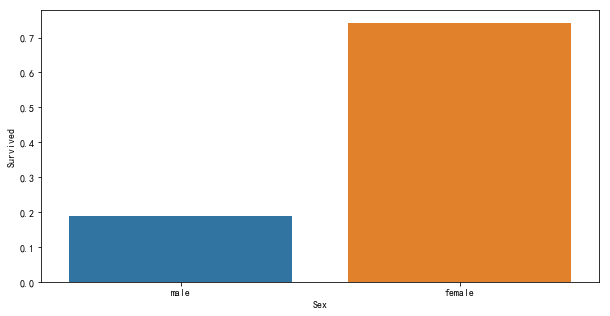

In [31]:
plt.figure(figsize = (10,5))
sns.barplot(data = df,x = 'Sex',y = 'Survived',ci = None)
plt.show()

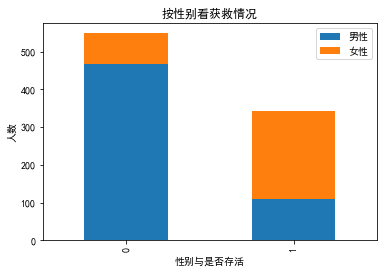

In [32]:
Survived_m = df.Survived[df.Sex == 'male'].value_counts()
Survived_f = df.Survived[df.Sex == 'female'].value_counts()
df2 = pd.DataFrame({'男性':Survived_m,'女性':Survived_f})
df2.plot(kind = 'bar', stacked = True)
plt.title('按性别看获救情况')
plt.xlabel('性别与是否存活')
plt.ylabel('人数')
plt.show()

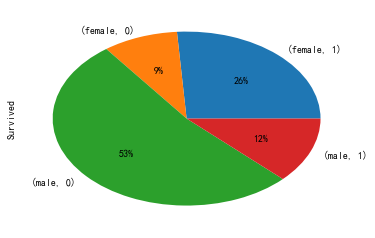

In [49]:
s = df.groupby('Sex')['Survived'].value_counts()
# print(s)
s.plot.pie(autopct = '%1.0f%%')
plt.show()

# 综合考虑性别Sex、舱位Pclass与生还率关系

In [33]:
#首先计算不同舱位不同性别的人的生还概率
df.pivot_table(values = 'Survived',index = ['Pclass','Sex'],aggfunc = np.mean)

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null object
Embarked       891 non-null object
price          891 non-null float64
dtypes: float64(1), int64(6), object(5)
memory usage: 83.6+ KB


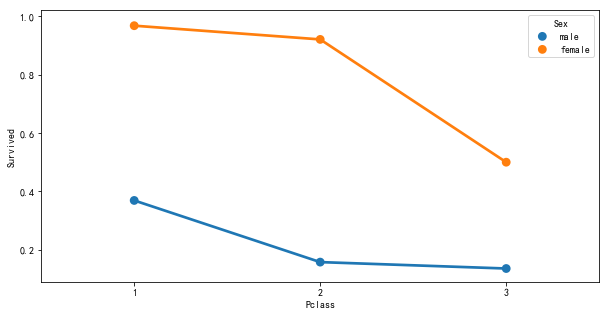

In [35]:
plt.figure(figsize = (10,5))
sns.pointplot(data = df,x = 'Pclass',y = 'Survived',hue = 'Sex',ci = None)
plt.show()

In [36]:
#结论：
#在各个船舱中，女性的生还率都大于男性
#一二等舱中女性生还率接近，且远大于三等舱
#一等舱的男性生还率大于二三等舱，二三等舱男性生还率接近

# 年龄Age与生还率关系

In [37]:
#与上面的舱位、性别这些分类变量不同，年龄是一个连续的数值变量，一般处理这样的数据类型，
#我们采用将连续性的变量离散化的方法。
#所谓离散化，指的是将某个变量的所在区间分割为几个小区间，落在同一个区间的观测值用同一个符号
#表示，简单理解就是将属于同一范围类的观测值分为一组。然后分组观察。

In [38]:
df['AgeGroup'] = pd.cut(df['Age'],5)

In [39]:
df.AgeGroup.value_counts(sort = False)

(-0.08, 16.0]    100
(16.0, 32.0]     525
(32.0, 48.0]     186
(48.0, 64.0]      69
(64.0, 80.0]      11
Name: AgeGroup, dtype: int64

In [40]:
df.pivot_table(values = 'Survived',index = 'AgeGroup',aggfunc = 'mean')

,Survived
AgeGroup,
"(-0.08, 16.0]",0.550000
"(16.0, 32.0]",0.344762
"(32.0, 48.0]",0.403226
"(48.0, 64.0]",0.434783
"(64.0, 80.0]",0.090909


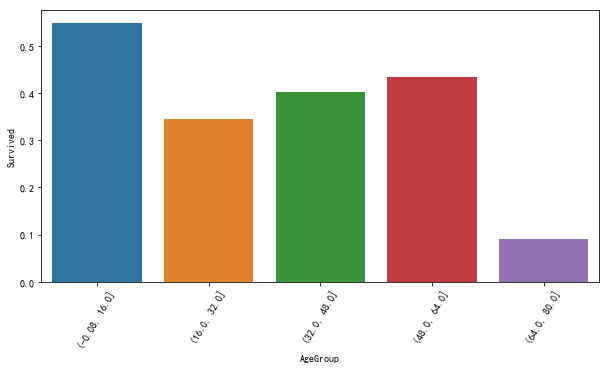

In [41]:
plt.figure(figsize = (10,5))
sns.barplot(data = df,x = 'AgeGroup',y = 'Survived',ci = None)
plt.xticks(rotation = 60)
plt.show()

In [42]:
#结论：儿童少年组的生还率更高

# 年龄Age、性别Sex与生还率关系

In [50]:
df.pivot_table(values = 'Survived',index = 'AgeGroup',columns = 'Sex',
              aggfunc = 'mean')

Sex,female,male
AgeGroup,,
"(-0.08, 16.0]",0.673469,0.431373
"(16.0, 32.0]",0.718391,0.159544
"(32.0, 48.0]",0.791045,0.184874
"(48.0, 64.0]",0.916667,0.177778
"(64.0, 80.0]",NaN,0.090909


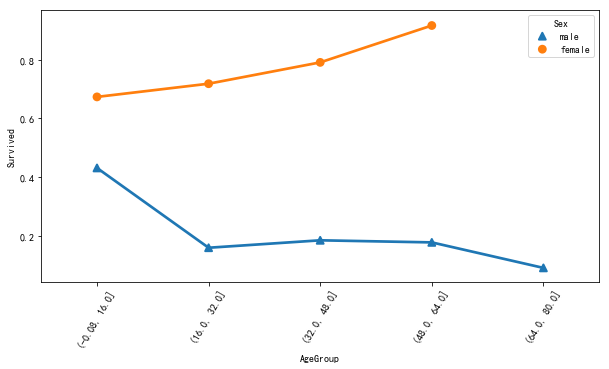

In [51]:
plt.figure(figsize = (10,5))
sns.pointplot(data = df,x = 'AgeGroup',y = 'Survived',hue = 'Sex',ci = None,
             markers = ['^','o'],linestypes = ['-','--'])
plt.xticks(rotation = 60)
plt.show()

In [52]:
#结论：儿童少年，女性的生还率更高。男性生还的大都是儿童少年

# 年龄Age、性别Sex、舱位Pclass与生还率关系

In [53]:
df.pivot_table(values = 'Survived',index = 'AgeGroup',
              columns = ['Sex','Pclass'],aggfunc = 'mean')

Sex              female                          male                    
Pclass                1         2         3         1         2         3
AgeGroup                                                                 
(-0.08, 16.0]  0.833333  1.000000  0.545455  1.000000  0.818182  0.270270
(16.0, 32.0]   0.975610  0.923077  0.521277  0.354167  0.086207  0.138776
(32.0, 48.0]   1.000000  0.904762  0.250000  0.435897  0.076923  0.055556
(48.0, 64.0]   0.941176  0.833333  1.000000  0.269231  0.090909  0.000000
(64.0, 80.0]        NaN       NaN       NaN  0.166667  0.000000  0.000000

D:\appinstallation\anacondainstall\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


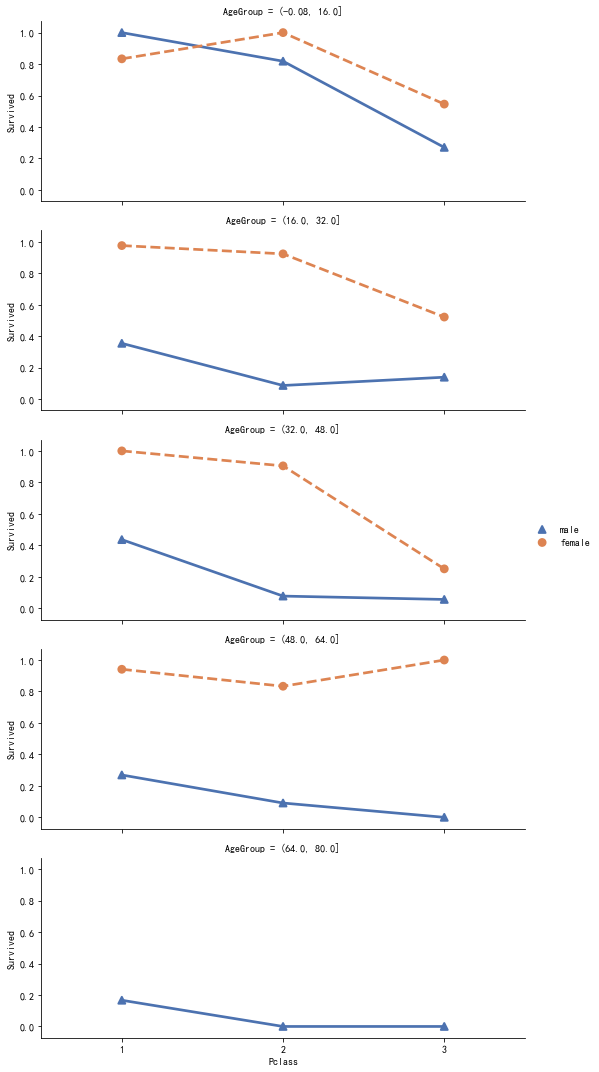

In [55]:
sns.FacetGrid(data = df,row = 'AgeGroup',aspect = 2.5)\
.map(sns.pointplot,'Pclass','Survived','Sex',hue_order = ['male','female'],
    ci = None,palette = 'deep',markers = ['^','o'],linestyles = ['-','--']).add_legend()
plt.show()

In [ ]:
#总结：
#本次分析主要探寻泰坦尼克号上的生还率和各因素(客舱等级、年龄、性别、上传港口等)的关系。
#样本数量为891，海难发生后，生还者还剩342人，生还率为38%。
#其中头等舱的生还率最大、其次是二等舱、三等舱的概率最小。
#891人中，男性工577人，女性314人，女性生还率远远大于男性。可见女性比男性在这次事故
#中更容易生还，表明‘女士优先’的原则在本次事故中得到了发扬。
#样本的891人中，最小年龄为0.42，最大年龄为80，按照[(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] 
#< (48.168, 64.084] < (64.084, 80.0]]划分原则，划分为5组，儿童少年组的生还率最高，
#年龄越大、生还率越低。‘尊老爱幼’的原则在本次事故中没有很好体寒。
#样本的891人中，从C上船的生还率最高，Q上船的次之，S上船生还率最低。
#最后需要说明的是，此次数据分析的数据集是从总体中抽样而来的，如果抽样无偏，
#样本是从总体随机选取，根据中心极限定理，分析结果具有代表性，如果不是随机选出，那么分析结果就不可靠了。

In [56]:
#画条形图，反映生存与否和所在舱位等级的关系
cross_table = pd.crosstab(df.Pclass,df.Survived)

In [59]:
cross_table

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


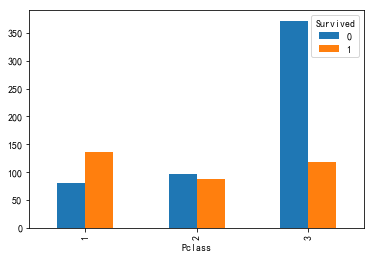

In [58]:
cross_table.plot(kind = 'bar')
plt.show()

In [60]:
#同理，性别与生存与否的关系
survived_sex = pd.crosstab(df.Sex,df.Survived)

In [61]:
survived_sex

Survived,0,1
Sex,,
female,81,233
male,468,109


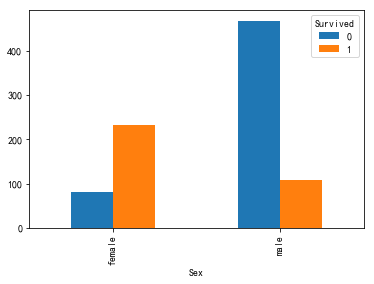

In [62]:
survived_sex.plot(kind = 'bar')